In [1]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime

style.use('ggplot')

# instantiate start date and end date
start_date = '2017-01-01'
end_date = str(datetime.now().strftime('%Y-%m-%d'))

# import data from yahoo finance api using pandas_datareader

# Gold
gold = 'GC=F'
# Dow Jones Index
dji = '^DJI'
# S&P 500
gspc = '^GSPC'
# NASDAQ
ixic = '^IXIC'
# Bitcoin
btc = 'BTC-USD'
# Etherium
eth = 'ETH-USD'
# XRP/Ripple
xrp = 'XRP-USD'

asset_list = [gold, dji, btc, ixic, eth, gspc, xrp]


def clean_data(asset_data, col, ticker):
    if '^' in ticker:
        weekdays = pd.date_range(start=start_date, end=end_date)
        clean_data = asset_data[col].reindex(weekdays)
        asset_data['Change'] = np.log(asset_data['Adj Close'] / asset_data['Adj Close'].shift())
        asset_data['Volatility 20'] = asset_data['Change'].rolling(20).std().shift()
        asset_data['Volatility 200'] = asset_data['Change'].rolling(200).std().shift()
        return clean_data.fillna(method='ffill')
    else:
        clean_data = asset_data[col]
        asset_data['Change'] = np.log(asset_data['Adj Close'] / asset_data['Adj Close'].shift())
        asset_data['Volatility 20'] = asset_data['Change'].rolling(20).std().shift()
        asset_data['Volatility 200'] = asset_data['Change'].rolling(20).std().shift()
        return clean_data.fillna(method='ffill')

    
def create_plot(asset_data, ticker):
    stats = get_stats(asset_data)
    plt.subplots(figsize=(15,8))
    plt.plot(asset_data, label=ticker)
    plt.plot(stats['short_rolling'], label='20 day moving average')
    plt.plot(stats['long_rolling'], label='200 day moving average')
    plt.xlabel('Year')
    plt.ylabel('Adj Closing Price')
    plt.legend(loc='upper left')
    plt.title('Asset Price Change Over Time')
    plt.show()


def volatility_plot(asset_data, ticker):
    fig, axs = plt.subplots(2, figsize=(8,4))
    fig.suptitle('Volatility Index 20 days(top) 200 days (bottom)')
    axs[0].plot(asset_data['Volatility 20'].iloc[-20:], label=ticker)
    axs[1].plot(asset_data['Volatility 200'].iloc[-200:], label=ticker)
    fig.tight_layout()
    fig.show()

    
    
    # future volume graph

    # ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    # ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    # ax1.plot(asset_data, label=ticker)
    # ax1.plot(stats['short_rolling'], label='20 day moving average')
    # ax1.plot(stats['long_rolling'], label='200 day moving average')
    # ax2.bar(asset_data.index, asset_data['Volume'])
    
    
def get_stats(asset_data):
    return {
        'last': np.mean(asset_data.tail(1)),
        'short_mean': np.mean(asset_data.tail(20)),
        'long_mean': np.mean(asset_data.tail(200)),
        'short_rolling': asset_data.rolling(window=20).mean(),
        'long_rolling': asset_data.rolling(window=200).mean()
    }


def get_data(ticker):
    try:
        asset_data = data.DataReader(ticker,
                                     'yahoo',
                                     start_date,
                                     end_date
                                    )
        adj_close = clean_data(asset_data, 'Adj Close', ticker)
        create_plot(adj_close, ticker)
        volatility_plot(asset_data, ticker)
        return asset_data

    
    except:
        print('No data found for {t}'.format(t=ticker))
        


# EDA

## Dow Jones versus Bitcoin

### Dow Jones

/Users/Shaun/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


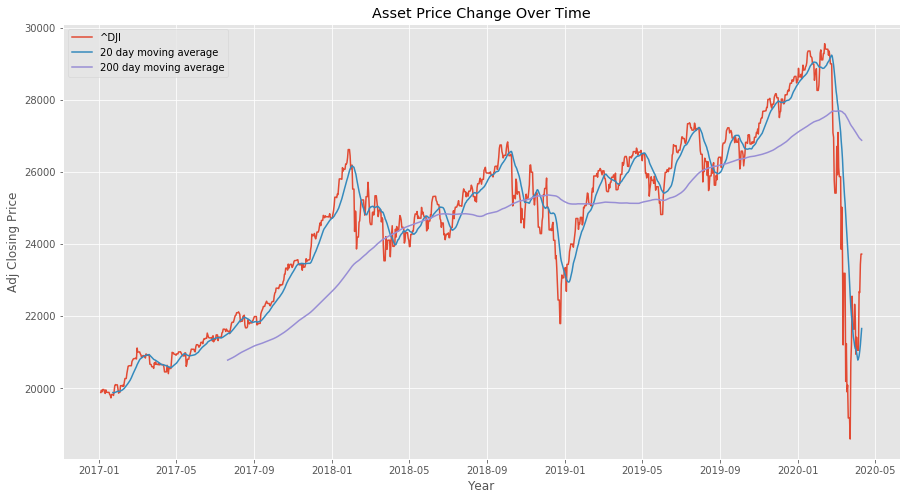

/Users/Shaun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


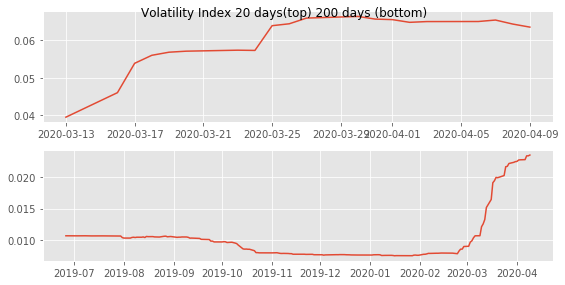

In [2]:
dji_df = get_data(dji)


The Dow Jones has performed well over the past 3 years. The 200 days moving average line indicates steady growth up until shelter-in-order began. After that, we see that volatility index skyrocket with correlations to the market crashing.

### Bitcoin

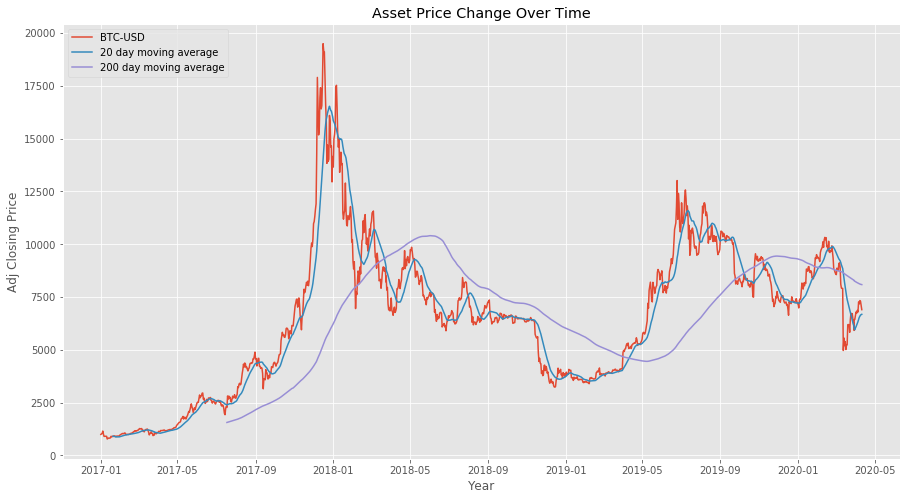

/Users/Shaun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


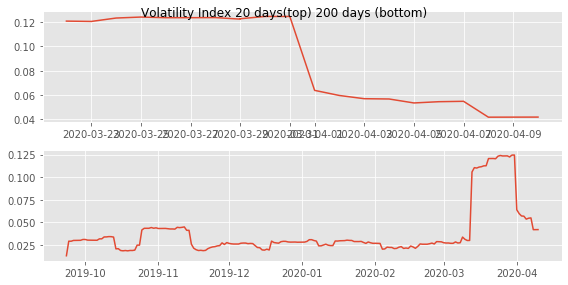

In [3]:
btc_df = get_data(btc)


We see a giant bubble burst within bitcoin prices and subsequent recovery. This could be an indication that cryptocurrencies are highly speculative but this cryptocurrency in particular is once again showing strong recovery. We can cleary see that the volatility of price has gone done indicating that bitcoin may have already stabilized since COVID has halted the economy.

### Insights

As we can see, both markets are subject to speculation and volitivity, but bitcoin prices vary greatly. It seems to have gone through and amazing bubble at the end of 2017. It is interesting to note that the Dow Jones has experienced similiar highs and lows at near the same time of bitcoin. While price growth for bitcoin has been shakey, the coin has reacted well to COVID-19, in that prices have seemed to recover while stock prices have continued to fall, and on average, back to values not seen since early 2017. It would make sense, as cryptocurrencies will not be subject to the same woes as corporations will on the stock market as these companies may not be able to work or produce.

## NASDAQ versus Etherium

### NASDAQ

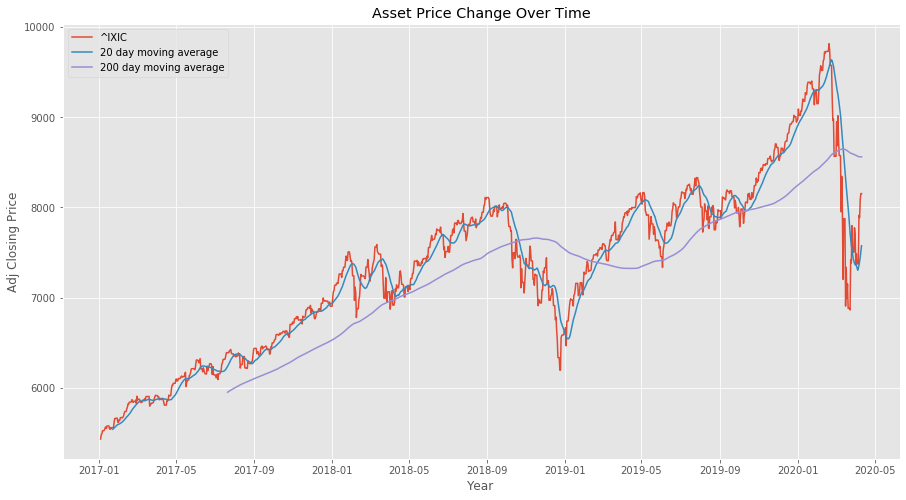

/Users/Shaun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


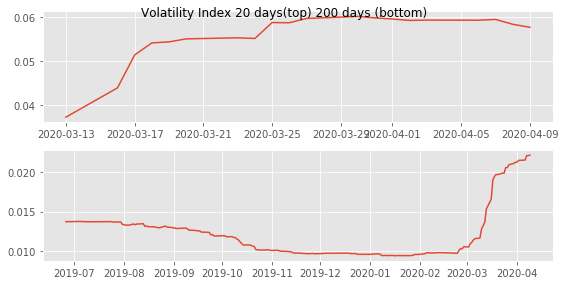

In [4]:
ixic_df = get_data(ixic)


The NASDAQ, similiar to the Dow Jones, has performed very well overall but was severly impacted by COVID-19. Both 20 day and 200 day volatility indexes show sharp increases in changes to stock price around the time shelter-in-place orders were given.

### Etherium

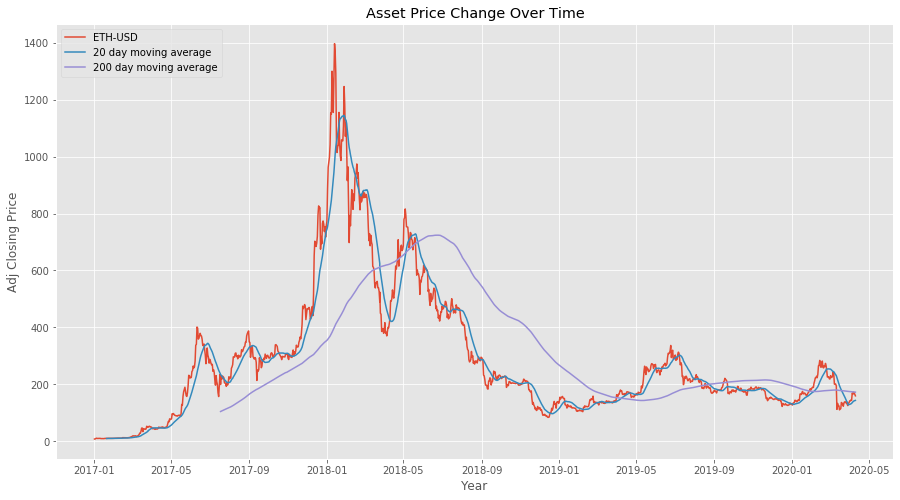

/Users/Shaun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


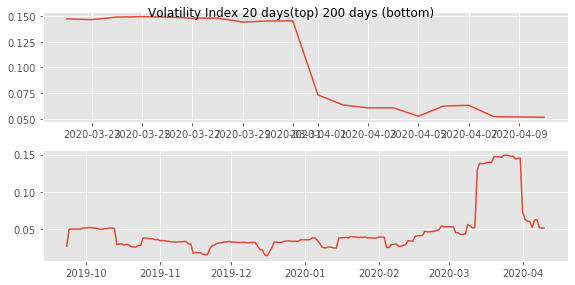

In [5]:
eth_df = get_data(eth)


Etherium has not recovered as well from the cryptocurrency bubble of early 2018. We have seen a steady decline in the price as time has gone on. Similiar to bitcoin, in that it has seemingly stabilized since COVID-19.

### Insights

NASDAQ interestingly enough was the first all electronic trading exchange. Investors from previous generations balked at this idea, stating that high frequency trading this allowed would cos markets to spiral out of control due to sheer speculation. The NASDAQ however, is still here, and showed strong gains over the past 3 years. Etherium was slated to follow bitcoin but did not recover in price as well as, showing a steady decrease in price since then. We can see that Etherium's bubble occured slightly after bitcoins, possibly showing the net effect of hyper speculation.

## S&P 500 versus XRP/Ripple

### S&P 500

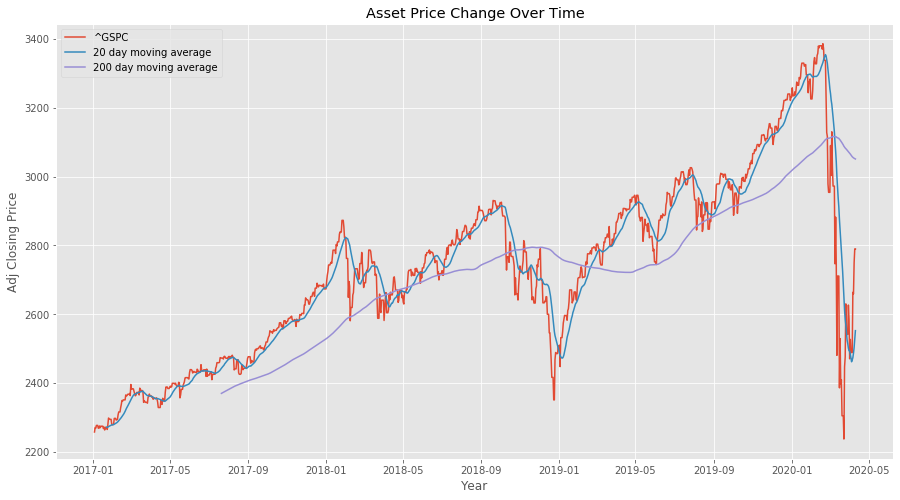

/Users/Shaun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


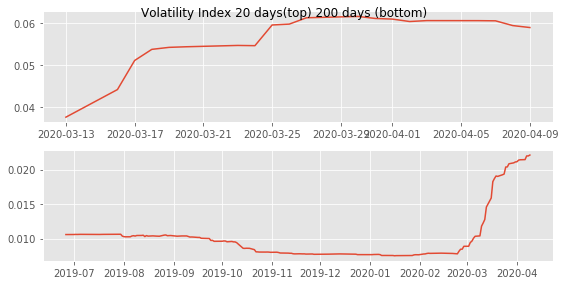

In [6]:
gspc_df = get_data(gspc)


The S&P index has gone through similiar market changes as the other two stock exchanges. Similiar 3 year growth, with a similiar nose dive corresponding to shelter-in-place orders. The volatility indexes also show the same patterns as the Dow Jones and NASDAQ.

### XRP/Ripple

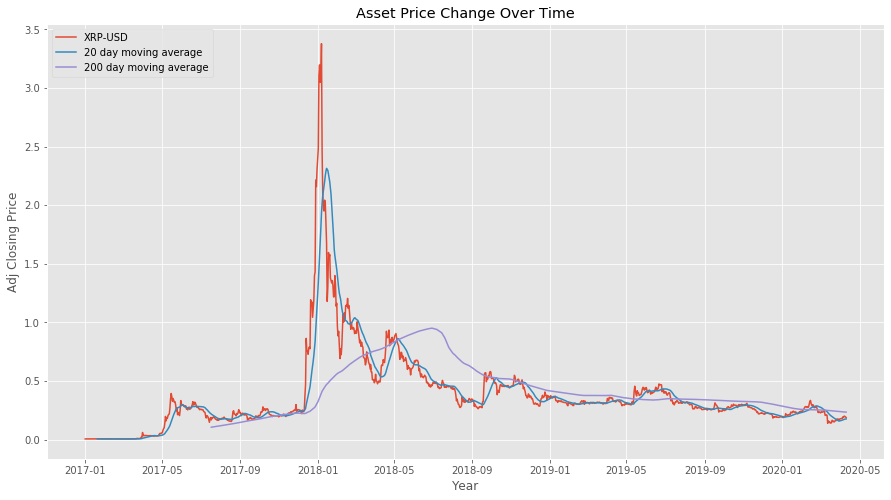

/Users/Shaun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


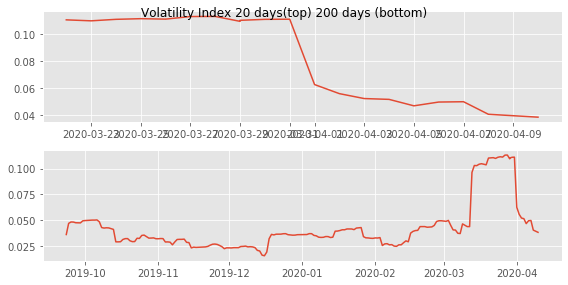

In [7]:
xrp_df = get_data(xrp)


XRP/Ripple has had very similiar performance to Etherium. Initially a bubble burst, then the average price seems to be winding down to zero. Not a great sign for the health of cryptocurrency, but strong recoveries show the power of having a commidity be able to react to the supply and demand of the market so quickly.

### Insights

We can begin to see a trend that crypto with lower populations of users and lower values tend to be disappearing in value all together. This is very alarming, 

# Hypothesis Testing

We will Hypothesis test with the [Mann-Whitney U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) which will no make any distributional assumptions considering the distributions of our assets could be very complicated. We will adopt the **Null Hypothesis** that each cryptocurrency is equally likely to grow in price as it's respective stock exchange counterpart. The **Alternate Hypothesis** is that the stock exchanges are better places for investment because they have better growth. We will test each hypothesis to a threshold of $\alpha = 0.05$ for each category.



## Dow Jones versus Bitcoin

### 3 year growth
  
> $H_0$: Bitcoin is likely to grow in price less than the Dow Jones grows in price. I.e.
  
  $$P(\text{Dow Jones Index growth} > \text{Bitcoin growth})
  
> $H_{a}$: Bitcoin is likely to grow in price greater than the Dow Jones grows in price. I.e.

  $$P(\text{Dow Jones Index growth} < \text{Bitcoin growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.011


We accept the **Alternative**, the p value for this competition is less than our threshold, signifying that the long term potential of bitcoin growth over the Dow Jones.

In [8]:
res = stats.mannwhitneyu(btc_df['Change'], dji_df['Change'], alternative="greater")
print(res)
print("p-value for Bitcoin < Dow Jones: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=521714.5, pvalue=0.010825555636654714)
p-value for Bitcoin < Dow Jones: 0.011


### Short term growth (20 days)

> $H_0$: Bitcoin is likely to grow in price less than the Dow Jones grows in price. I.e.
  
  $$P(\text{Dow Jones Index growth} > \text{Bitcoin growth})
  
> $H_{a}$: Bitcoin is likely to grow in price greater than the Dow Jones grows in price. I.e.

  $$P(\text{Dow Jones Index growth} < \text{Bitcoin growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.601
  
We accept the **Null**, with great significance we can say that in the short term, Dow Jones will grow and will likely to out grow bitcoin.

In [9]:
res = stats.mannwhitneyu(btc_df['Change'].iloc[-20:], dji_df['Change'].iloc[-20:], alternative="greater")
print(res)
print("p-value for Bitcoin < Dow Jones: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=191.0, pvalue=0.6014012903654127)
p-value for Bitcoin < Dow Jones: 0.601


### Longer term growth (200 days)

> $H_0$: Bitcoin is likely to grow in price less than the Dow Jones grows in price. I.e.
  
  $$P(\text{Dow Jones Index growth} > \text{Bitcoin growth})
  
> $H_{a}$: Bitcoin is likely to grow in price greater than the Dow Jones grows in price. I.e.

  $$P(\text{Dow Jones Index growth} < \text{Bitcoin growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.896
  
We accept the **Null** once again. Long term growth for the Dow Jones will surpass that of bitcoin.

In [10]:
res = stats.mannwhitneyu(btc_df['Change'].iloc[-200:], dji_df['Change'].iloc[-200:], alternative="greater")
print(res)
print("p-value for Bitcoin < Dow Jones: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=18545.0, pvalue=0.8959717036633996)
p-value for Bitcoin < Dow Jones: 0.896


## NASDAQ versus Etherium

### 3 year growth
  
> $H_0$: Etherium is likely to grow in price less than the NASDAQ grows in price. I.e.
  
  $$P(\text{NASDAQ Index growth} > \text{Etherium growth})
  
  
> $H_{a}$: Etherium is likely to grow in price greater than the NASDAQ grows in price. I.e.

  $$P(\text{NASDAQ Index growth} < \text{Etherium growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.414
  


In [11]:
res = stats.mannwhitneyu(ixic_df['Change'], eth_df['Change'], alternative="greater")
print(res)
print("p-value for Etherium < NASDAQ: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=494960.0, pvalue=0.4137334811351292)
p-value for Etherium < NASDAQ: 0.414


### Short term growth (20 days)
  
> $H_0$: Etherium is likely to grow in price less than the NASDAQ grows in price. I.e.
  
  $$P(\text{NASDAQ Index growth} > \text{Etherium growth})
  
  
> $H_{a}$: Etherium is likely to grow in price greater than the NASDAQ grows in price. I.e.

  $$P(\text{NASDAQ Index growth} < \text{Etherium growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.409
  

In [12]:
res = stats.mannwhitneyu(ixic_df['Change'].iloc[-20:], eth_df['Change'].iloc[-20:], alternative="greater")
print(res)
print("p-value for Etherium < NASDAQ: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=209.0, pvalue=0.40907473069409994)
p-value for Etherium < NASDAQ: 0.409


### Longer term growth (200 days)
  
> $H_0$: Etherium is likely to grow in price less than the NASDAQ grows in price. I.e.
  
  $$P(\text{NASDAQ Index growth} > \text{Etherium growth})
  
  
> $H_{a}$: Etherium is likely to grow in price greater than the NASDAQ grows in price. I.e.

  $$P(\text{NASDAQ Index growth} < \text{Etherium growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.304

In [13]:
res = stats.mannwhitneyu(ixic_df['Change'].iloc[-200:], eth_df['Change'].iloc[-200:], alternative="greater")
print(res)
print("p-value for Etherium < NASDAQ: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=20593.0, pvalue=0.3041576089242222)
p-value for Etherium < NASDAQ: 0.304


We accept the **Null** for each category. In any term we have tested, NASDAQ will out grow Etherium.

## S&P 500 versus XRP/Ripple

### 3 year growth
  
> $H_0$: XRP/Ripple is likely to grow in price less than the S&P 500 grows in price. I.e.
  
  $$P(\text{S&P 500 Index growth} > \text{XRP/Ripple growth})
  
  
> $H_{a}$: XRP/Ripple is likely to grow in price greater than the S&P 500 grows in price. I.e.

  $$P(\text{S&P 500 Index growth} < \text{XRP/Ripple growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.013
  


In [14]:
res = stats.mannwhitneyu(gspc_df['Change'], xrp_df['Change'], alternative="greater")
print(res)
print("p-value for XRP/Ripple < S&P 500: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=520861.0, pvalue=0.012869492752024052)
p-value for XRP/Ripple < S&P 500: 0.013


### Short term growth (20 days)

> $H_0$: XRP/Ripple is likely to grow in price less than the S&P 500 grows in price. I.e.
  
  $$P(\text{S&P 500 Index growth} > \text{XRP/Ripple growth})
  
  
> $H_{a}$: XRP/Ripple is likely to grow in price greater than the S&P 500 grows in price. I.e.

  $$P(\text{S&P 500 Index growth} < \text{XRP/Ripple growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.484

In [15]:
res = stats.mannwhitneyu(gspc_df['Change'].iloc[-20:], xrp_df['Change'].iloc[-20:], alternative="greater")
print(res)
print("p-value for XRP/Ripple < S&P 500: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=201.0, pvalue=0.4946044523955598)
p-value for XRP/Ripple < S&P 500: 0.495


### Longer term growth (200 days)

> $H_0$: XRP/Ripple is likely to grow in price less than the S&P 500 grows in price. I.e.
  
  $$P(\text{S&P 500 Index growth} > \text{XRP/Ripple growth})
  
  
> $H_{a}$: XRP/Ripple is likely to grow in price greater than the S&P 500 grows in price. I.e.

  $$P(\text{S&P 500 Index growth} < \text{XRP/Ripple growth})
  
  $\alpha = 0.05$
  
  **P Value** = 0.414

In [16]:
res = stats.mannwhitneyu(gspc_df['Change'].iloc[-200:], xrp_df['Change'].iloc[-200:], alternative="greater")
print(res)
print("p-value for XRP/Ripple < S&P 500: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=20251.0, pvalue=0.41423327239869806)
p-value for XRP/Ripple < S&P 500: 0.414
